## Importing Packages

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
plt.style.use('dark_background')

## Importing Data

In [2]:
df = pd.read_csv('/Users/thangle/Downloads/vlk_fraud 1.csv')
df.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X21,X22,X23,X24,X25,X26,X27,X28,Amount,Transaction_ID
0,0.288031,0.533099,-0.750054,-0.622710,0.355750,-0.066000,0.290031,0.252320,0.967904,-0.043124,...,0.065213,-0.019050,0.039540,1.577486,-0.761577,-0.701221,1.501575,-0.450915,2.70,9991622972803468315
1,-0.490082,0.713361,-1.576719,-0.603743,-1.064526,-0.210060,1.117863,-0.646029,0.326218,0.300454,...,-0.335998,-0.134917,0.213190,-0.225310,1.796268,-0.765555,0.542492,-1.424360,173.49,11084406015651466253
2,0.337351,-0.828948,-0.843122,-1.369146,0.452701,-0.491439,0.277849,-0.041046,0.709560,0.041543,...,-0.389947,-0.059352,0.534841,0.614328,0.171136,-0.411693,0.183883,-0.465929,0.91,10197587932662340273
3,-2.066729,0.114450,-0.756314,0.615028,-0.206941,1.116745,0.131014,-0.838473,-0.694850,-0.436614,...,-0.022732,-0.065497,0.199421,0.000145,0.327291,-0.589111,-0.574982,1.249703,65.00,13576113269769860024
4,0.470390,0.662612,0.261084,0.305759,-0.314468,0.143505,-0.584696,0.273699,0.095393,-0.168639,...,0.354065,-0.067891,0.158497,-1.608643,-0.321899,-0.669961,1.253848,2.019645,1.31,7097340918492760609


In [3]:
df.describe

<bound method NDFrame.describe of              X01       X02       X03       X04       X05       X06       X07  \
0       0.288031  0.533099 -0.750054 -0.622710  0.355750 -0.066000  0.290031   
1      -0.490082  0.713361 -1.576719 -0.603743 -1.064526 -0.210060  1.117863   
2       0.337351 -0.828948 -0.843122 -1.369146  0.452701 -0.491439  0.277849   
3      -2.066729  0.114450 -0.756314  0.615028 -0.206941  1.116745  0.131014   
4       0.470390  0.662612  0.261084  0.305759 -0.314468  0.143505 -0.584696   
...          ...       ...       ...       ...       ...       ...       ...   
284802 -0.188069  0.000866  0.462066 -0.261152  0.575270  0.199415  0.178386   
284803 -1.457867  0.044336  0.303596 -0.240991  0.025716 -0.065406 -0.125746   
284804  0.815654  0.453436 -0.085707  0.991589 -0.061046  0.142082  0.099296   
284805  0.087063  0.243026  0.859579 -0.010583 -1.322841  0.332658  0.067256   
284806  1.238743 -0.183663  3.021534 -1.412518  1.188528  0.036698 -1.638139   

     

In [4]:
df.isna().sum()

X01               0
X02               0
X03               0
X04               0
X05               0
X06               0
X07               0
X08               0
X09               0
X10               0
X11               0
X12               0
X13               0
X14               0
X15               0
X16               0
X17               0
X18               0
X19               0
X20               0
X21               0
X22               0
X23               0
X24               0
X25               0
X26               0
X27               0
X28               0
Amount            0
Transaction_ID    0
dtype: int64

In [5]:
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X21,X22,X23,X24,X25,X26,X27,X28,Amount,Transaction_ID
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,-1.771900e-09,-7.507560e-09,-1.513338e-08,2.784988e-08,1.148663e-08,1.173395e-08,-1.051190e-08,-3.824057e-08,-2.915113e-08,1.381567e-08,...,-1.685801e-09,-3.604456e-09,-8.765015e-09,3.144324e-08,1.935940e-08,-8.385114e-10,1.322300e-08,-2.349140e-08,88.360903,9.229775e+18
std,8.762529e-01,6.056471e-01,1.098632e+00,8.493371e-01,9.952742e-01,4.822270e-01,9.585956e-01,8.140405e-01,1.651309e+00,7.709250e-01,...,6.244603e-01,4.036325e-01,8.381762e-01,1.516255e+00,5.212781e-01,1.332271e+00,1.020713e+00,1.958696e+00,250.119937,5.322697e+18
min,-1.412985e+01,-2.836641e+00,-1.343408e+01,-2.516280e+01,-5.791868e+00,-2.604544e+00,-1.921433e+01,-7.213528e+00,-7.271573e+01,-5.449771e+01,...,-4.480772e+01,-2.256570e+01,-9.498735e+00,-4.832560e+01,-1.029541e+01,-2.616051e+01,-4.797478e+00,-5.640751e+01,0.000000,3.328309e+13
25%,-4.680376e-01,-3.545855e-01,-6.430950e-01,-4.837521e-01,-6.485387e-01,-3.269941e-01,-4.255785e-01,-4.562987e-01,-5.985563e-01,-2.117242e-01,...,-1.618458e-01,-7.083955e-02,-4.988343e-01,-8.903663e-01,-3.171489e-01,-7.682863e-01,-7.624842e-01,-9.203734e-01,5.610000,4.626541e+18
50%,6.639909e-02,4.097943e-02,-5.143277e-02,-6.567217e-02,-1.356639e-02,-5.213230e-02,5.059384e-02,3.727799e-03,6.550689e-02,-6.248414e-02,...,-1.119577e-02,1.343666e-03,-3.632207e-03,1.798392e-01,1.658879e-02,-2.741860e-01,-3.275915e-02,1.809514e-02,22.000000,9.208989e+18
75%,5.232931e-01,4.395305e-01,5.971458e-01,3.996695e-01,6.625103e-01,2.409508e-01,4.931492e-01,4.589577e-01,8.037292e-01,1.330434e-01,...,1.476427e-01,9.104178e-02,5.008025e-01,1.027185e+00,3.507118e-01,3.985688e-01,7.395943e-01,1.315643e+00,77.180000,1.384357e+19
max,1.731510e+01,4.584546e+00,1.559502e+01,9.253542e+00,7.126888e+00,3.517362e+00,1.052678e+01,5.591966e+00,2.205771e+01,3.942088e+01,...,2.252840e+01,3.161220e+01,5.041063e+00,9.382569e+00,7.519585e+00,7.330164e+01,1.201892e+01,2.454919e+00,25691.170000,1.844672e+19


## Features Selection

In [6]:
list_of_X = []
i = 1
while i in range(1,29,1):
    if i < 10:
        val = f'X0{i}'
        list_of_X.append(val)
    else:
        val = f'X{i}'
        list_of_X.append(val)
    i += 1

print(list_of_X)

['X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08', 'X09', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28']


In [7]:
X = df[list_of_X].values

In [8]:
X

array([[  0.28803075,   0.53309885,  -0.7500539 , ...,  -0.70122082,
          1.50157518,  -0.45091521],
       [ -0.49008244,   0.71336135,  -1.57671855, ...,  -0.76555528,
          0.54249236,  -1.42436021],
       [  0.33735074,  -0.82894849,  -0.84312222, ...,  -0.41169311,
          0.18388321,  -0.46592911],
       ...,
       [  0.8156538 ,   0.45343637,  -0.08570733, ...,  -1.04893196,
         -1.36723445,  -1.9447343 ],
       [  0.08706309,   0.24302593,   0.85957873, ...,   0.37753588,
          1.15184399,   1.01313911],
       [  1.23874256,  -0.18366307,   3.02153385, ...,   0.55475357,
          2.25556252, -21.49588783]])

## Splitting then Scaling features

In [9]:
sc = StandardScaler()
X_train, X_test = train_test_split(X, test_size=0.3,
                                    random_state=2)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
pca = PCA(n_components = 8)
#X_train_pca = pca.fit_transform(X_train_std)
#X_test_pca = pca.transform(X_test)
#Standard scaler already applied to the dataset already
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [73]:
X_pca = pca.transform(X)

## Expalined Variance Ratio Plot & principal component revealed

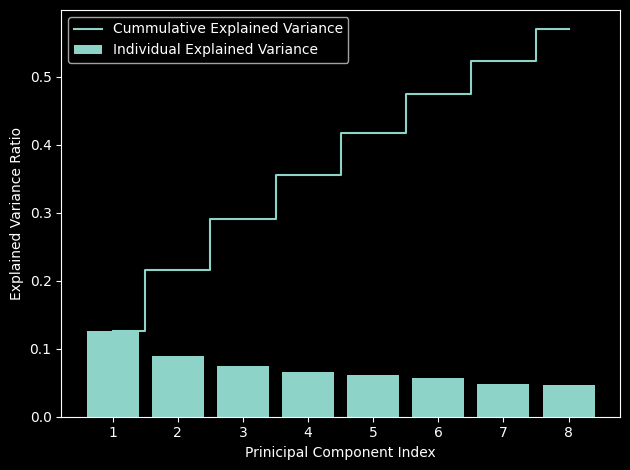

In [19]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)

plt.bar(range(1,9), explained_var_ratio, align = 'center',
        label = 'Individual Explained Variance')
plt.step(range(1,9), cumulative_var, where = 'mid',
        label = 'Cummulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Prinicipal Component Index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [21]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

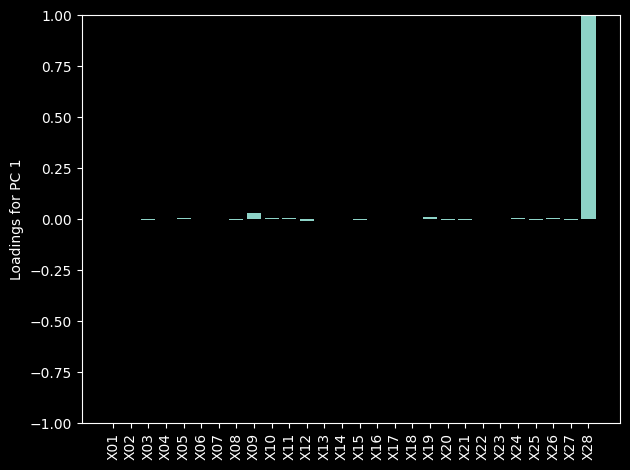

In [26]:
fig, ax = plt.subplots()
ax.bar(range(28), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(28))
ax.set_xticklabels(list_of_X, rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

# Making Sense of new PCA features

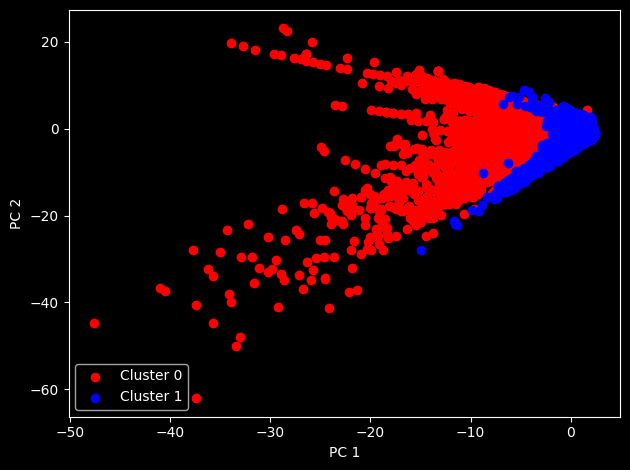

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

colors = ['r', 'b', 'g']
for i in range(2):
    plt.scatter(X_train_pca[clusters == i, 0], 
                X_train_pca[clusters == i, 1], 
                c=colors[i], label=f'Cluster {i}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [40]:
unique, counts = np.unique(clusters, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} transactions")

Cluster 0: 104249 transactions
Cluster 1: 95115 transactions


Model seems to clustering a lot more than our goal (100 transaction). Let's use a different method

# One Class SVM

In [44]:
oc_svm = OneClassSVM(nu=0.05, gamma='scale')
oc_svm.fit(X_train_pca)

OneClassSVM(nu=0.05)

In [45]:
svm_predictions = oc_svm.predict(X_train_pca)
n_anomalies = np.sum(svm_predictions == -1)
n_normal = np.sum(svm_predictions == 1)
print(f"Normal transactions: {n_normal}")
print(f"Anomalous transactions: {n_anomalies}")
print(f"Anomaly rate: {n_anomalies/len(svm_predictions):.3f}")

Normal transactions: 189390
Anomalous transactions: 9974
Anomaly rate: 0.050


A bit better, but still flagging more than we expected

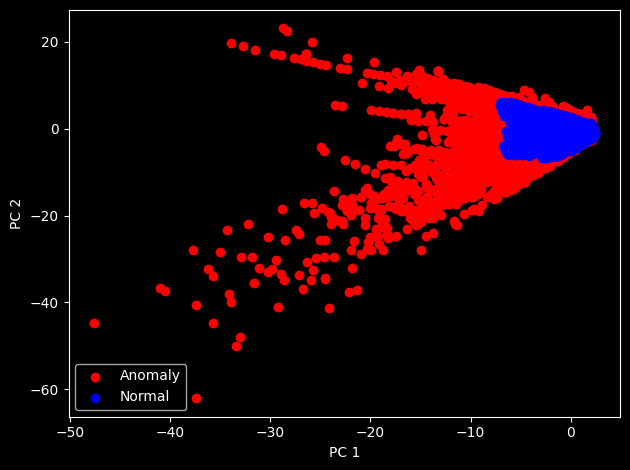

In [50]:
colors = ['red', 'blue']
for pred, color, label in zip([-1, 1], colors, ['Anomaly', 'Normal']):
    mask = svm_predictions == pred
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], 
                c=color, label=label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

# Isolation Forest

In [51]:
from sklearn.ensemble import IsolationForest


In [63]:
iso_forest = IsolationForest(
    contamination=0.0005,    # Target ~100 anomalies (0.05%)
    max_samples=256,         
    n_estimators=50,         
    random_state=42, 
    n_jobs=-1
)
iso_predictions = iso_forest.fit_predict(X_train_pca)


In [64]:
n_anomalies = np.sum(iso_predictions == -1)
n_normal = np.sum(iso_predictions == 1)
print(f"Normal transactions: {n_normal}")
print(f"Anomalous transactions: {n_anomalies}")
print(f"Anomaly rate: {n_anomalies/len(iso_predictions):.3f}")

Normal transactions: 199266
Anomalous transactions: 98
Anomaly rate: 0.000


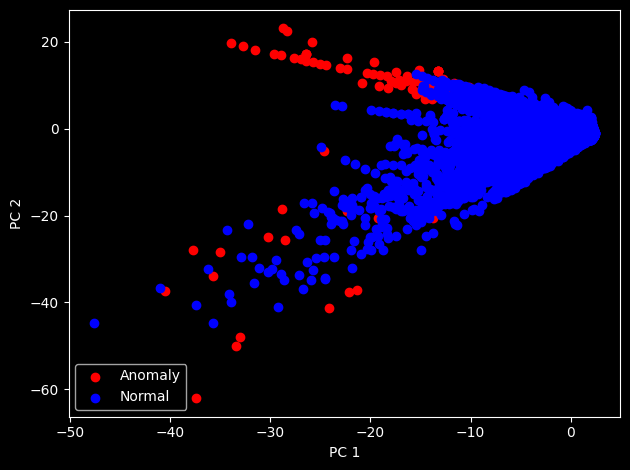

In [65]:
colors = ['red', 'blue']
for pred, color, label in zip([-1, 1], colors, ['Anomaly', 'Normal']):
    mask = iso_predictions == pred  # Changed from svm_predictions to iso_predictions
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], 
                c=color, label=label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Pytorch

Let's bring in the big guns - Pytorch

In [67]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score

In [68]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Define autoencoder architecture
class DeepSVDDAutoencoder(nn.Module):
    def __init__(self, input_dim=8, hidden_dims=[16, 8, 4], latent_dim=2):
        super(DeepSVDDAutoencoder, self).__init__()
        
        # Encoder
        encoder_layers = []
        prev_dim = input_dim
        for hidden_dim in hidden_dims:
            encoder_layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(0.1)
            ])
            prev_dim = hidden_dim
        
        encoder_layers.append(nn.Linear(prev_dim, latent_dim))
        self.encoder = nn.Sequential(*encoder_layers)
        
        # Decoder
        decoder_layers = []
        prev_dim = latent_dim
        for hidden_dim in reversed(hidden_dims):
            decoder_layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.ReLU(),
                nn.Dropout(0.1)
            ])
            prev_dim = hidden_dim
        
        decoder_layers.append(nn.Linear(prev_dim, input_dim))
        self.decoder = nn.Sequential(*decoder_layers)
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# Initialize model
model = DeepSVDDAutoencoder(input_dim=8).to(device)  # 8 PCA components
print(f"Model created on {device}")

Using device: mps
Model created on mps


In [69]:
# Prepare data for PyTorch
X_train_tensor = torch.FloatTensor(X_train_pca).to(device)
X_test_tensor = torch.FloatTensor(X_test_pca).to(device)

# Training parameters
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

print("Starting training on Metal GPU...")

# Training loop
model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed, encoded = model(X_train_tensor)
    
    # Reconstruction loss
    loss = criterion(reconstructed, X_train_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

print("Training completed!")

# Calculate reconstruction errors for anomaly detection
model.eval()
with torch.no_grad():
    train_reconstructed, _ = model(X_train_tensor)
    train_errors = torch.mean((X_train_tensor - train_reconstructed) ** 2, dim=1)
    
print(f"Reconstruction errors calculated - Min: {train_errors.min():.6f}, Max: {train_errors.max():.6f}")

Starting training on Metal GPU...
Epoch [20/100], Loss: 2.200203
Epoch [40/100], Loss: 2.191188
Epoch [60/100], Loss: 2.174704
Epoch [80/100], Loss: 2.097942
Epoch [100/100], Loss: 1.966151
Training completed!
Reconstruction errors calculated - Min: 0.028785, Max: 899.121338


In [71]:
# Convert errors back to CPU for processing
train_errors_cpu = train_errors.cpu().numpy()

# Method 1: Use percentile threshold (top 0.05% as anomalies)
threshold_percentile = np.percentile(train_errors_cpu, 99.95)  # Top 0.05%
neural_anomalies_percentile = train_errors_cpu > threshold_percentile


# Check results
print(f"Percentile method - Threshold: {threshold_percentile:.3f}, Anomalies: {np.sum(neural_anomalies_percentile)}")
print(f"Absolute method - Threshold: {threshold_absolute:.3f}, Anomalies: {np.sum(neural_anomalies_absolute)}")

# Use the absolute method to get ~100 anomalies
neural_predictions = np.where(neural_anomalies_absolute, -1, 1)  # Convert to SVM format

Percentile method - Threshold: 156.188, Anomalies: 100
Absolute method - Threshold: 156.233, Anomalies: 99


Total anomalies detected: 99
Threshold: 187.762


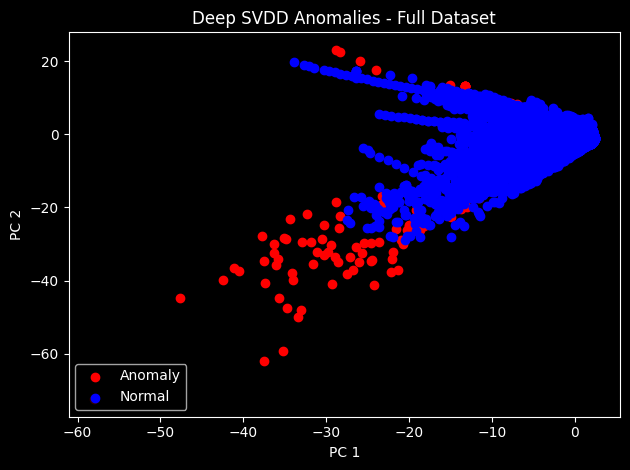

In [74]:
# Convert all data to tensor and get reconstruction errors
X_all_tensor = torch.FloatTensor(X_pca).to(device)

model.eval()
with torch.no_grad():
    all_reconstructed, _ = model(X_all_tensor)
    all_errors = torch.mean((X_all_tensor - all_reconstructed) ** 2, dim=1)

# Convert to CPU for processing
all_errors_cpu = all_errors.cpu().numpy()

# Apply anomaly detection to get ~100 anomalies
target_anomalies = 100
threshold = np.partition(all_errors_cpu, -target_anomalies)[-target_anomalies]
neural_anomalies = all_errors_cpu > threshold

print(f"Total anomalies detected: {np.sum(neural_anomalies)}")
print(f"Threshold: {threshold:.3f}")

# Convert to prediction format (-1 for anomaly, +1 for normal)
neural_predictions = np.where(neural_anomalies, -1, 1)

# Plot using your full dataset
colors = ['red', 'blue']
for pred, color, label in zip([-1, 1], colors, ['Anomaly', 'Normal']):
    mask = neural_predictions == pred
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=color, label=label)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Deep SVDD Anomalies - Full Dataset')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [79]:
def plot_neural_decision_regions(X, y, model, device, resolution=0.02):
    colors = ('red', 'blue')
    cmap = ListedColormap(colors)
    
    # Create 2D grid
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Pad grid points to 8 dimensions (fill remaining 6 with zeros)
    grid_2d = np.array([xx1.ravel(), xx2.ravel()]).T
    grid_8d = np.zeros((grid_2d.shape[0], 8))  # 8 PCA components
    grid_8d[:, :2] = grid_2d  # First 2 components from grid
    
    grid_tensor = torch.FloatTensor(grid_8d).to(device)
    
    model.eval()
    with torch.no_grad():
        grid_reconstructed, _ = model(grid_tensor)
        grid_errors = torch.mean((grid_tensor - grid_reconstructed) ** 2, dim=1)
    
    # Use same threshold as your data
    grid_errors_cpu = grid_errors.cpu().numpy()
    target_anomalies = 100
    threshold = np.partition(all_errors_cpu, -target_anomalies)[-target_anomalies]  # Use your existing threshold
    
    grid_predictions = np.where(grid_errors_cpu > threshold, 0, 1)  # 0=anomaly, 1=normal for colors
    grid_predictions = grid_predictions.reshape(xx1.shape)
    
    # Plot decision surface
    plt.contourf(xx1, xx2, grid_predictions, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot actual data points
    for idx, cl in enumerate([-1, 1]):  # -1=anomaly, 1=normal
        color = 'red' if cl == -1 else 'blue'
        label = 'Anomaly' if cl == -1 else 'Normal'
        plt.scatter(X[y == cl, 0], X[y == cl, 1],
                    c=color, label=label, alpha=0.8, edgecolor='black')
    
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.title('Deep SVDD Decision Regions')


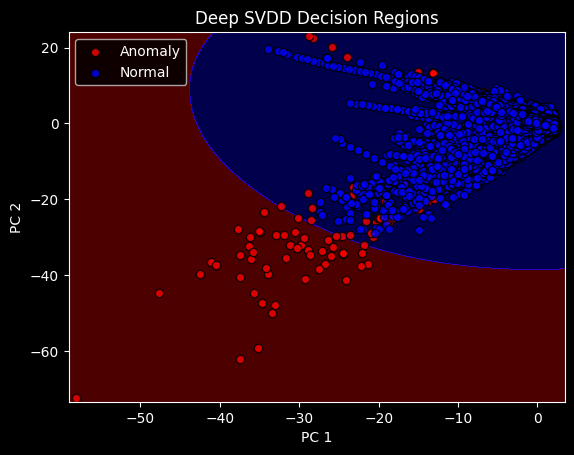

In [80]:
# Use it
plot_neural_decision_regions(X_pca, neural_predictions, model, device)
plt.show()